In [1]:
#第一題
import requests
import json
import pandas as pd

data = requests.get('https://datacenter.taichung.gov.tw/swagger/OpenData/b6645324-551f-4ba0-9e8b-d2de43567319').json()
df = pd.json_normalize(data)
print (df)

          序號  縣市別代碼        機關代碼            市話            傳真     年  月   日   時  \
0          1  66000  387130000C  (04)23274275  (04)23288582  2023  8   1   0   
1          2  66000  387130000C  (04)23274275  (04)23288582  2023  8   1   4   
2          3  66000  387130000C  (04)23274275  (04)23288582  2023  8   1   4   
3          4  66000  387130000C  (04)23274275  (04)23288582  2023  8   1   6   
4          5  66000  387130000C  (04)23274275  (04)23288582  2023  8   1   6   
...      ...    ...         ...           ...           ...   ... ..  ..  ..   
12136  12137  66000  387130000C  (04)23274275  (04)23288582  2023  8  31  23   
12137  12138  66000  387130000C  (04)23274275  (04)23288582  2023  8  31  23   
12138  12139  66000  387130000C  (04)23274275  (04)23288582  2023  8  31  23   
12139  12140  66000  387130000C  (04)23274275  (04)23288582  2023  8  31  23   
12140  12141  66000  387130000C  (04)23274275  (04)23288582  2023  8  31  23   

        分  ... 車輛撞擊部位其他 肇事因素個別 肇事因素主要 肇

--2023-11-23 01:13:55--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.196.100, 74.125.196.138, 74.125.196.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oqa9n9mro6t462ushdrog6o11lc97cnu/1700702025000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=3b58b2ce-b38b-4f0a-a4dc-e0a34da53f71 [following]
--2023-11-23 01:13:56--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oqa9n9mro6t462ushdrog6o11lc97cnu/1700702025000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=3b58b2ce-b38b-4f0a-a4dc-e0a34da53f71
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to doc-0

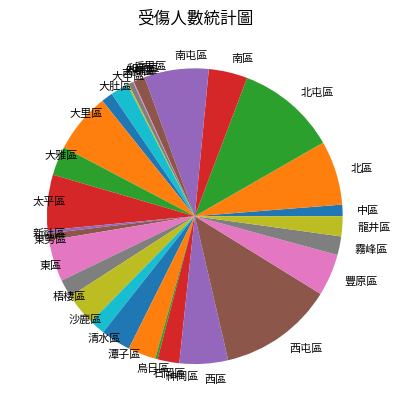

In [6]:
#第二題-1
import matplotlib.pyplot as plt
import numpy as np
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')


df['受傷數量'] = pd.to_numeric(df['受傷數量'])
groupsum = df.groupby('區').sum('受傷數量')
plt.pie(groupsum['受傷數量'], labels = groupsum.index, textprops={'fontsize': 8}, center = (4,4))
plt.title ('受傷人數統計圖')
plt.show()

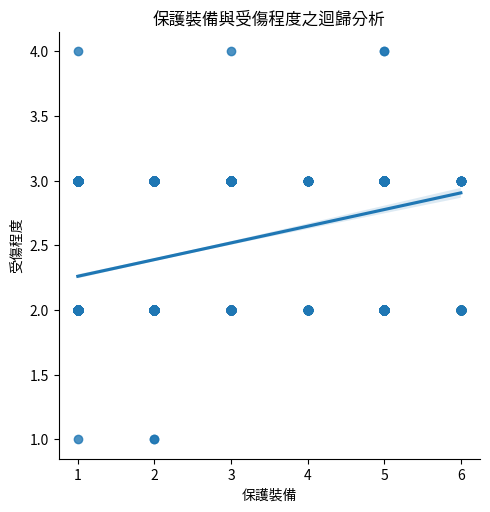

In [7]:
#第二題-2
import seaborn as sns

df[['保護裝備', '受傷程度']].dropna()
df['保護裝備'] = pd.to_numeric(df['保護裝備'])
df['受傷程度'] = pd.to_numeric(df['受傷程度'])
sns.lmplot (df[['保護裝備', '受傷程度']], x='保護裝備', y='受傷程度').set(title = ('保護裝備與受傷程度之迴歸分析'))